# Getting Started
In this post, we'll demonstrate some of the core functionality of the **SDMetrics** library by using it to evaluate a synthetic dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Generating Synthetic Datasets
The **SDV** library provides tools for generating synthetic relational databases. Let's start by loading the Walmart dataset and generating a synthetic copy with 20 rows in the root table.

In [2]:
from sdv import load_demo

metadata, real_tables = load_demo("walmart", metadata=True)
for table_name, df in real_tables.items():
    print(">", table_name)
    print(df.head().to_string(index=False))
    print()

> stores
 Store Type    Size
     1    A  151315
     2    A  202307
     3    B   37392
     4    A  205863
     5    B   34875

> features
 Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday
     1 2010-02-05        42.31       2.572        NaN        NaN        NaN        NaN        NaN  211.096358         8.106      False
     1 2010-02-12        38.51       2.548        NaN        NaN        NaN        NaN        NaN  211.242170         8.106       True
     1 2010-02-19        39.93       2.514        NaN        NaN        NaN        NaN        NaN  211.289143         8.106      False
     1 2010-02-26        46.63       2.561        NaN        NaN        NaN        NaN        NaN  211.319643         8.106      False
     1 2010-03-05        46.50       2.625        NaN        NaN        NaN        NaN        NaN  211.350143         8.106      False

> depts
 Store  Dept       Date  Weekly_Sales  I

In [3]:
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, real_tables)

synthetic_tables = sdv.sample_all(100)
for table_name, df in synthetic_tables.items():
    print(">", table_name)
    print(df.head().to_string(index=False))
    print()

> stores
Type    Size  Store
   A  213178      0
   A  161959      1
   B   52047      2
   B  139747      3
   B  202028      4

> features
                         Date     MarkDown1  Store  IsHoliday   MarkDown4     MarkDown3  Fuel_Price  Unemployment  Temperature    MarkDown5     MarkDown2         CPI
2013-02-24 15:42:51.765077504           NaN      0      False -6398.11463  16671.303639    3.558381      6.738988    88.322154  6388.697657  17223.792884  176.060812
2012-07-17 10:21:04.109254912  17403.320688      0      False         NaN           NaN    3.666979      7.174856    72.303166          NaN  13587.186333  186.074708
2011-12-14 15:46:36.602722304  10484.088916      0      False         NaN   1077.439738    3.295589      8.401885    61.208604          NaN   3729.969024  199.613992
2009-03-30 22:30:18.733320704  -9663.509270      0      False         NaN           NaN    2.821261           NaN    27.667123  -984.242194           NaN  227.890390
2011-10-14 04:39:44.152434432

## Evaluation with SDMetrics
Now that we have (1) a metadata object, (2) a set of real tables, and (3) a set of fake tables, we can pass them to **SDMetrics** for evaluation. The simplest way to get started with **SDMetrics** is to use the `evaluate` function which generates a report with the default metrics.

In [4]:
from sdmetrics import evaluate
report = evaluate(metadata, real_tables, synthetic_tables)
report

The metrics report can provide an **overall score**. This is a single scalar value which you can pass to an optimization routine (i.e. to tune some hyperparameters in your model).

In [5]:
print(report.overall())

-58.78717418000785


Furthermore, the metrics report can also provide some key highlights. This shows the problem areas where your model performs especially poorly - for example, the below highlights suggest that our model is very bad at modeling the `MarkDownX` columns since the kstest has detected that the distributions look quite different between the real and synthetic versions.

In [6]:
report.highlights()

,Columns,Goal,Misc. Tags,Name,Tables,Unit,Value
0,column:MarkDown1,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,4.301373e-23
1,column:MarkDown4,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,1.055098e-60
2,column:MarkDown3,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,7.251224e-253
3,column:Fuel_Price,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,2.136220e-75
4,column:Unemployment,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,5.182947e-69
5,column:Temperature,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,4.109717e-22
6,column:MarkDown5,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,3.471358e-16
7,column:MarkDown2,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,2.773154e-254
8,column:CPI,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:features,p-value,0.000000e+00
9,column:Weekly_Sales,Goal.MAXIMIZE,"priority:high,statistic:univariate",kstest,table:depts,p-value,0.000000e+00


In addition, you will also be able to generate a visualization of the metrics.

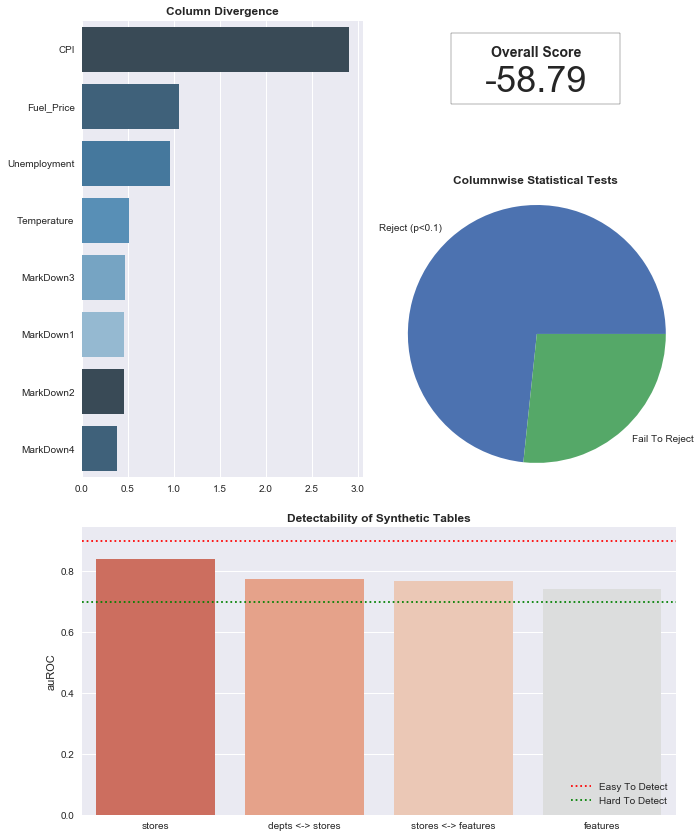

In [7]:
%matplotlib inline
report.visualize().savefig("../resources/visualize.png");

Finally, you can also print a detailed report containing all of the metrics that were computed.

In [8]:
report.details()

,Columns,Goal,Misc. Tags,Name,Tables,Unit,Value
0,,Goal.MAXIMIZE,child:features,foreign-key,table:stores,binary,1.000000e+00
1,,Goal.MAXIMIZE,child:depts,foreign-key,table:stores,binary,1.000000e+00
2,,Goal.MINIMIZE,detection:auroc,logistic,table:features,auroc,7.539284e-01
3,,Goal.MINIMIZE,detection:auroc,logistic,table:depts,auroc,7.700053e-01
4,,Goal.MINIMIZE,detection:auroc,logistic,table:stores,auroc,7.560507e-01
5,,Goal.MINIMIZE,detection:auroc,logistic,"table:stores,table:features",auroc,7.669569e-01
6,,Goal.MINIMIZE,detection:auroc,logistic,"table:depts,table:stores",auroc,7.736407e-01
7,column:Type,Goal.MAXIMIZE,statistic:univariate,chisquare,table:stores,p-value,9.627084e-01
8,column:IsHoliday,Goal.MAXIMIZE,statistic:univariate,chisquare,table:features,p-value,9.153868e-01
9,column:IsHoliday,Goal.MAXIMIZE,statistic:univariate,chisquare,table:depts,p-value,9.661065e-01
